In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from patsy import dmatrices
import statsmodels.api as sm 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from statsmodels.formula.api import logit
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


import warnings
warnings.simplefilter(action='ignore')

_____

### 1. Import the data as a dataframe for analysis

### 2. Perform the necessary preprocessing of the data to include:

> Dropping CustomerID from analysis

> Removing rows with null values (Hint: TotalCharges column has some missing values. While the values are numbers, you will need to convert this column’s values to number format to get the desired result. Obviously, there could be other options)

> Converting categorical variables to dummies
___

In [2]:
df_Telco = pd.read_csv("Telco_Customer_Churn.csv")
df_Telco = df_Telco.drop("customerID", axis = 1)

In [3]:
label_encoder = LabelEncoder()

contract_cat = df_Telco['Contract']
contract_encoded = label_encoder.fit_transform(contract_cat)

binary_encoder = OneHotEncoder(categories = 'auto')

contract_onehot = binary_encoder.fit_transform(contract_encoded.reshape(-1,1))
contract_onehot_mat = contract_onehot.toarray()
contract_DF = pd.DataFrame(contract_onehot_mat, columns = ['Month-to-Month', 
                                                           'One year', 
                                                           'Two year']).astype(int)

df_Telco = df_Telco.drop("Contract", axis = 1)
contract_DF.head()

,Month-to-Month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [4]:
df_Telco = pd.concat([df_Telco, contract_DF], 
                         axis = 1, verify_integrity = True)

In [5]:
df_Telco['TotalCharges'] = pd.to_numeric(df_Telco['TotalCharges'],errors='coerce')

In [6]:
df_Telco = pd.get_dummies(df_Telco,drop_first=True)

In [7]:
df_final = df_Telco.apply(pd.to_numeric)
df_Telco_final = df_Telco.replace(r'^\s*$', np.NaN, regex=True)

In [8]:
df_Telco_final = df_Telco_final.dropna()


In [9]:
df_Telco_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Month-to-Month,One year,Two year,gender_Male,Dependents_Yes,PhoneService_Yes,InternetService_Yes,DeviceProtection_Yes,TechSupport_Yes,CableService_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,0,0,1,1,1,1,0,1,1,1,0,0,0
7040,0,11,29.60,346.45,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1


In [10]:
df_Telco_final.shape

(7032, 19)

In [11]:
df_Telco_final.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Month-to-Month                             int32
One year                                   int32
Two year                                   int32
gender_Male                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
InternetService_Yes                        uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
CableService_Yes                           uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
Churn_Yes                                  uint8
dtype: object

____
### 3. Implement Logistic regression analysis using the full dataset (note: You also need to get the Odds ratios from your analysis)

In [12]:
X = df_Telco_final.drop('Churn_Yes', axis = 1)
y = df_Telco_final["Churn_Yes"]

In [13]:
LogReg = LogisticRegression(max_iter = 10000).fit(X, y)
LogReg.coef_

array([[ 3.43798351e-01, -7.41891749e-02,  1.78701257e-02,
         4.40562060e-04,  3.97969092e-01, -3.96902872e-01,
        -6.59504885e-01,  2.09579676e-02, -3.07590119e-01,
        -8.47931373e-01,  1.22757024e-01, -1.87576069e-01,
        -6.98512428e-01,  1.66564713e-02,  4.31749793e-01,
        -2.03675915e-01,  1.59975227e-01, -3.60518184e-01]])

In [14]:
LogitModel = sm.GLM(y, X, family = sm.families.Binomial())

model = LogitModel.fit(fit_intercept = True)

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Churn_Yes   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7014
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.2
Date:                Mon, 13 Jul 2020   Deviance:                       5892.5
Time:                        19:41:48   Pearson chi2:                 8.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [15]:
params = model.params
confidence_inter = model.conf_int()
confidence_inter['OR'] = params
confidence_inter.columns = ['2.5%', '97.5%', 'OR']

df_ConfidenceInt = pd.DataFrame(np.exp(confidence_inter))
df_ConfidenceInt

,2.5%,97.5%,OR
SeniorCitizen,1.092789,1.514318,1.286402
tenure,0.930094,0.952899,0.941428
MonthlyCharges,1.021334,1.035439,1.028362
TotalCharges,1.000152,1.000427,1.000289
Month-to-Month,0.327096,0.734659,0.490208
One year,0.150945,0.365415,0.234857
Two year,0.067549,0.187181,0.112445
gender_Male,0.873183,1.123518,0.990473
Dependents_Yes,0.717046,0.984235,0.840084
PhoneService_Yes,0.249096,0.469518,0.341987


___
### 4. Split the dataset into training set and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_Telco_final.drop('Churn_Yes', axis = 1), 
                                                    df_Telco_final['Churn_Yes'], 
                                                    test_size = 0.2,
                                                    random_state = 200
                                                   )

___

### 5. Using the Pipeline class of scikit-learn, impement analysis using the following techniques: 

* Logististic Regression 

* Nearest Neighbors

* Linear SVM, RBF SVM 

* MLPClassifier

* Decision Tree

* Naive Bayes (i.e., GaussianNB)

* Random Forest

* Bagginng

* AdaBoost

* XGBoost

In [17]:
ModelPipeline = ["Logististic Regression", 
             "Nearest Neighbors", 
             "Linear SVM", 
             "RBF SVM", 
             "MLP Classifier", 
             "Decision Tree", 
             "Naive Bayes", 
             "Random Forest",
             "Bagging", 
             "AdaBoost", 
             "XGBoost"]

PredictionAccuracy = []

Classifier = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = "linear", C = 0.05),
    SVC(gamma = 2, C = 0.05),
    MLPClassifier(alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive', max_iter = 1000),
    DecisionTreeClassifier(max_depth = 5),
    GaussianNB(),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
    BaggingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]


for model_ in Classifier:
    
    PipeLine_DF = Pipeline(steps=[
                      ('Classifier', model_)])
    PipeLine_DF.fit(X_train, y_train)   
    print(model_)
    
    PredictionAccuracy.append(100*PipeLine_DF.score(X_test, y_test))
    print("\n\n-----*-----*-----\n")
    

DF_PredictionAccuracy = pd.DataFrame(zip(ModelPipeline,PredictionAccuracy), 
                                    columns=['Classifier', 'Model Accuracy (%)'])



LogisticRegression()


-----*-----*-----

KNeighborsClassifier()


-----*-----*-----

SVC(C=0.05, kernel='linear')


-----*-----*-----

SVC(C=0.05, gamma=2)


-----*-----*-----

MLPClassifier(alpha=0.001, learning_rate='adaptive', max_iter=1000,
              solver='lbfgs')


-----*-----*-----

DecisionTreeClassifier(max_depth=5)


-----*-----*-----

GaussianNB()


-----*-----*-----

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


-----*-----*-----

BaggingClassifier()


-----*-----*-----

AdaBoostClassifier()


-----*-----*-----

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
     

In [18]:
DF_PredictionAccuracy

,Classifier,Model Accuracy (%)
0,Logististic Regression,79.175551
1,Nearest Neighbors,76.901208
2,Linear SVM,78.678038
3,RBF SVM,72.707889
4,MLP Classifier,78.962331
5,Decision Tree,77.114428
6,Naive Bayes,72.992182
7,Random Forest,77.185501
8,Bagging,77.398721
9,AdaBoost,78.535892



### 10. From 6, state the model you selected for final analysis
___

<p>The best predictive modeling algorithm is: <b><h4> Logistic Regression</h4></b></p>

___

In [19]:
LogReg_ = LogisticRegression(random_state=0)

LogReg_.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [20]:
LogReg_predict = LogReg_.predict(X_test)

print('Logistic Regression Accuracy (%): {:.2f}'.format(100*LogReg_.score(X_test, y_test)))

Logistic Regression Accuracy (%): 79.18


In [21]:
Predict_Q7 = [0, 32, 64.75, 2283.3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]

In [22]:
Predict_Q7_ = pd.DataFrame([Predict_Q7], columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Month-to-Month', 'One year', 'Two year', 'gender_Male',
       'Dependents_Yes', 'PhoneService_Yes', 'InternetService_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'CableService_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])




In [23]:
Predict_Q7_

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Month-to-Month,One year,Two year,gender_Male,Dependents_Yes,PhoneService_Yes,InternetService_Yes,DeviceProtection_Yes,TechSupport_Yes,CableService_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,32,64.75,2283.3,1,0,0,1,0,1,1,0,0,1,1,1,0,0


In [35]:
LogReg_PredictQ7 = LogReg_.predict(Predict_Q7_)

LogReg_PredictQ7 = pd.DataFrame(LogReg_PredictQ7, columns = ["Churn"])

LogReg_PredictQ7 = LogReg_PredictQ7.replace(0, "No")

LogReg_PredictQ7_Prob = LogReg_.predict_proba(Predict_Q7_)


____
### 7. Predict whether a customer with the characteristics given in the table on page 3 will churn or not (i.e., predict class membership). 

* Note: put a zero against any feature that is not application.
___


In [36]:
LogReg_PredictQ7

,Churn
0,No


### 8. Predict the probability whether a customer with the characteristics given in the table on page will churn or not. 

* Note: put a zero against any feature that is not application.

___

In [49]:
LogReg_PredictQ7_Prob


array([0.72994122, 0.27005878])

___
### 9. Create a new Word document. Copy and Paste the results from step 3 into your report. Discuss your results and their managerial implications.

___

___
### 6. Use the prediction accuracy score to select the best model

Fit the selected model and use the test data to assess its predictive performance by generating:

* Confussion matrix

* Classification report

* ROC curve

In [26]:
c_matrix = confusion_matrix(y_test, LogReg_predict)
c_matrix

array([[910, 113],
       [180, 204]], dtype=int64)

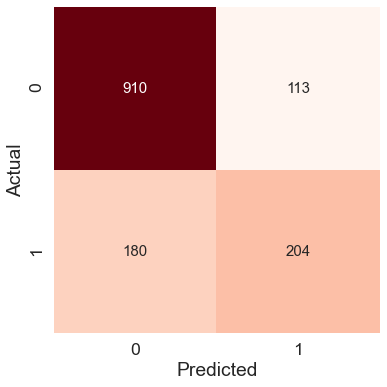

In [27]:
ConfusionM_DF = confusion_matrix(y_test, LogReg_predict)

ConfusionMatrix_DF = pd.DataFrame(ConfusionM_DF, columns = np.unique(y_test), index = np.unique(y_test))

ConfusionMatrix_DF.index.name = 'Actual'

ConfusionMatrix_DF.columns.name = 'Predicted'

plt.figure(figsize = (6, 6))

sns.set(font_scale = 1.6)

sns.heatmap(ConfusionMatrix_DF, annot = True, annot_kws = {"size": 15}, cbar = False,
          vmax = 500, square = True, fmt = "d", cmap = "Reds")

plt.show()

In [28]:
print(classification_report(y_test, LogReg_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           1       0.64      0.53      0.58       384

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



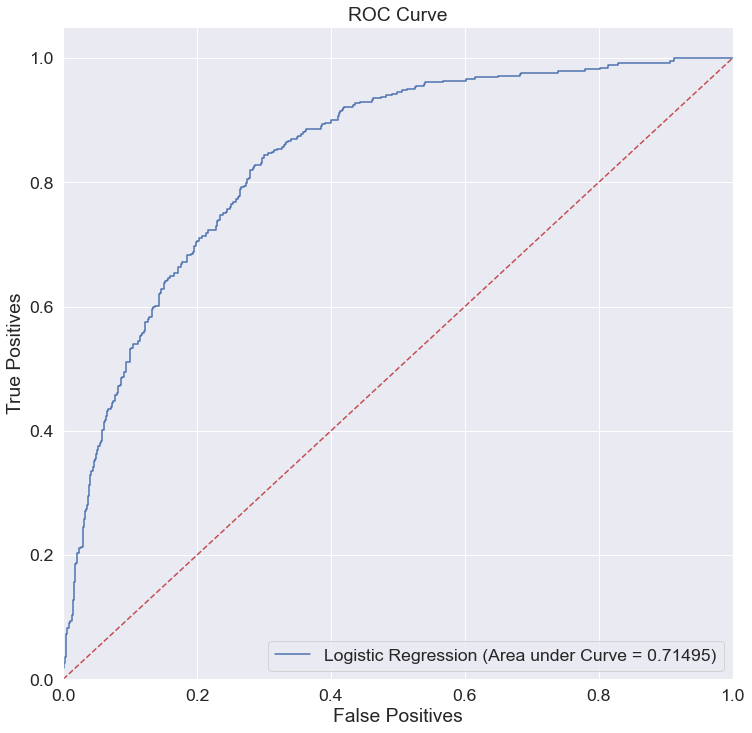

In [29]:
roc_area = roc_auc_score(y_test, LogReg.predict(X_test))

FPR, TPR, THRESHOLD = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure(figsize = (12, 12))

plt.plot(FPR, TPR, label='Logistic Regression (Area under Curve = %0.5f)' % roc_area)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positives')
plt.ylabel('True Positives')

plt.title('ROC Curve')

plt.legend(loc="lower right")

plt.show()

____

___

### 11. Copy and paste confussion matrix, classification report, and ROC curve into your Word document. Use these results to discuss the predictive performance of the model.

___

### 12. Copy and paste the results from steps 7 and 8 into your Word document. 

* Comment on the results about the expected outcome for this customer and suggest some managerials strategies for the Telco.

_____